# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [578]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [579]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [580]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [581]:
boston.data.shape

(506, 13)

In [582]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [583]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [584]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [585]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [586]:
print(boston.target.shape)

(506,)


In [587]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [588]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

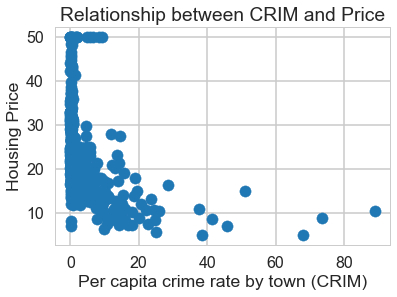

In [589]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [590]:
# your turn: describe relationship

### Ex. relation between CRIM and PRICE

I see a negative non-linear relationship. The housing price decreases with increase in per capita crime rate. There are some exceptionally high prices even with some crime which is unusual. And with very low crime rate the prices are in all the ranges. Since the relation looks non-linear and we want to fit a linear regression line, let us try log of CRIM feature.

Text(0.5,1,'Relationship between log(CRIM) and Price')

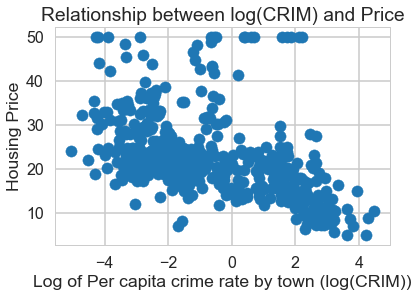

In [591]:
plt.scatter(np.log(bos.CRIM), bos.PRICE)
plt.xlabel("Log of Per capita crime rate by town (log(CRIM))")
plt.ylabel("Housing Price")
plt.title("Relationship between log(CRIM) and Price")

### Ex. sctter plots

Text(0.5,1,'Relationship between RM and Price')

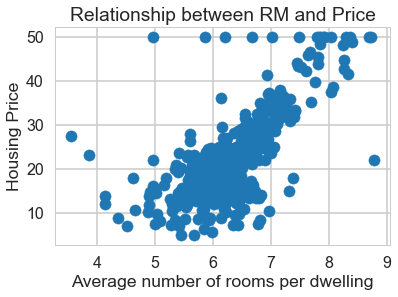

In [592]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

It is a positive linear relationship between avg number of rooms and housing price. However there are some exceptionally high priced houses for all numbers of rooms.

Text(0.5,1,'Relationship between PTRATIO and Price')

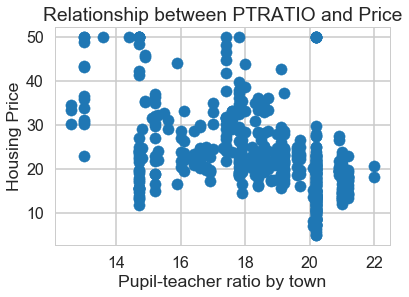

In [593]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

There is no strong relationship between pupil-teacher ratio and the house prices. For very high pupil-teacher ratio (>=21) the house prices are not very high, indicating some effect.

### Ex. some other interesting variables and their story

Text(0.5,1,'Relationship between DIS and Price')

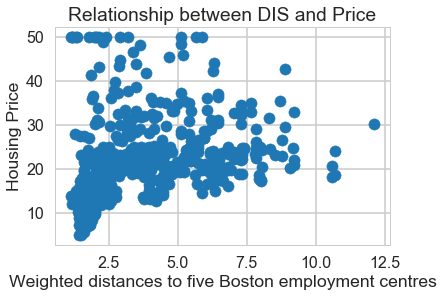

In [594]:
# your turn: create some other scatter plots
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

Text(0.5,1,'Relationship between NOX and Price')

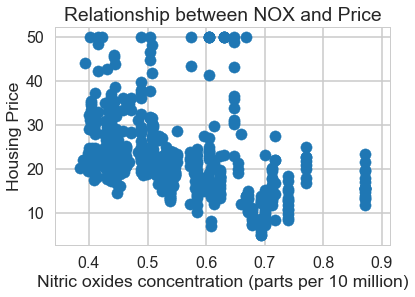

In [595]:
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("Nitric oxides concentration (parts per 10 million)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")

Text(0.5,1,'Relationship between LSTAT and Price')

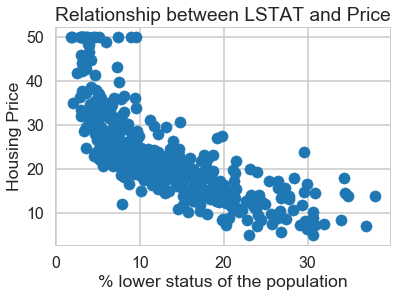

In [596]:
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

Strong negative non-linear relation between the lower status population and housing prices. It makes sense that where population status is low the owners can't afford higher prices houses.

Also there is weak negative relation between Distance from employement center and prices. And same for Nitric oxide concentrations and house prices.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

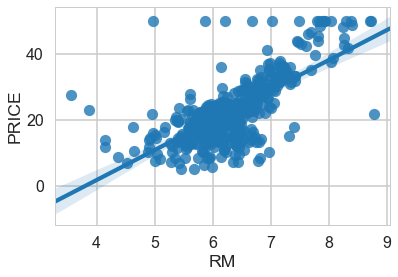

In [597]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Relation of all predictors to price and among themselves too.

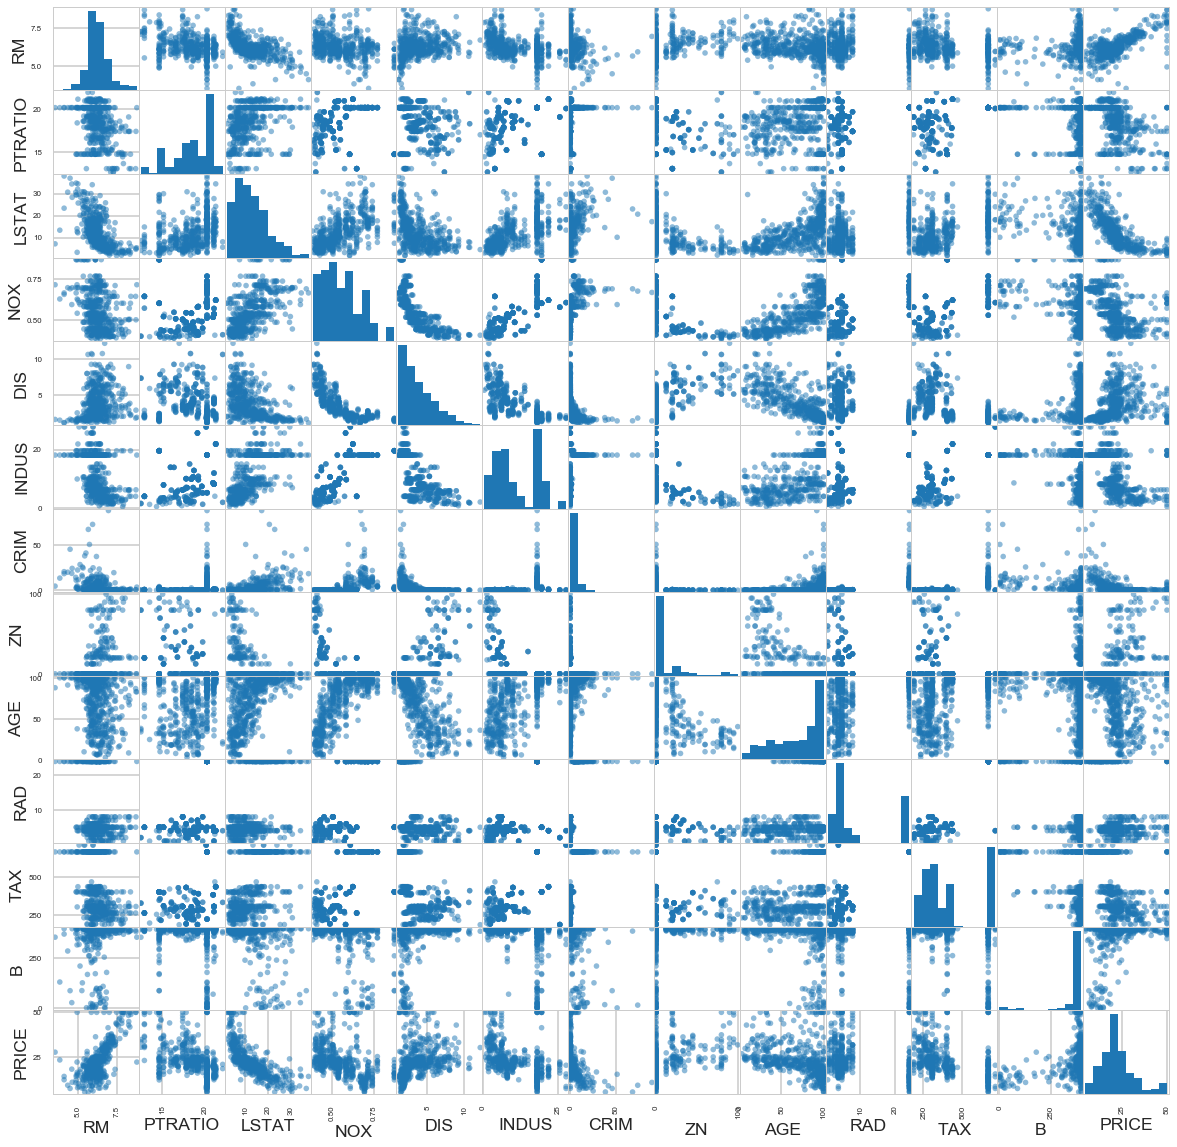

In [598]:
#other predictor variables
pd.plotting.scatter_matrix(bos.loc[:, ["RM","PTRATIO","LSTAT","NOX","DIS","INDUS","CRIM","ZN","AGE","RAD","TAX","B","PRICE"]], diagonal="hist",figsize=(20,20))

plt.figure(figsize=(50,50))
plt.show()

### Correlation among all variables

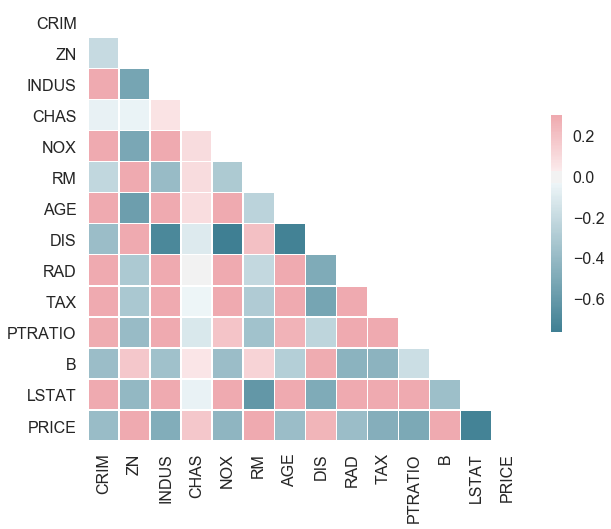

In [599]:
plt.figure(figsize=(10,8))

# let us try to visualize the correlation
corr = bos.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [600]:
# check correlation of others with PRICE
bos.corr().loc['PRICE', :].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

From the above correlation analysis we see variables that are strongly linearly related with PRICE. And also some of the correlated features like DIS and AGE etc. This will help us to choose a good model for our regression. Some more scatter diags below.

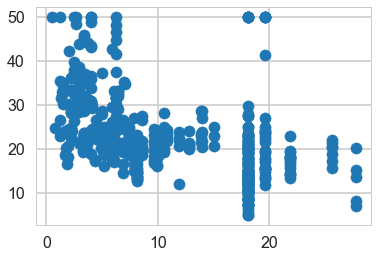

In [601]:
plt.scatter(bos.INDUS, bos.PRICE)

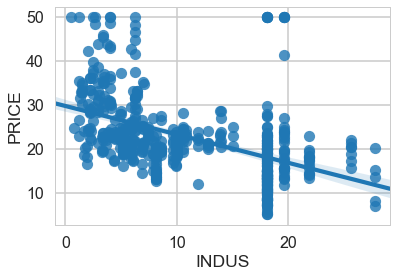

In [602]:
sns.regplot(y="PRICE", x="INDUS", data=bos, fit_reg = True)

In [603]:
print(bos.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


### Histograms
***


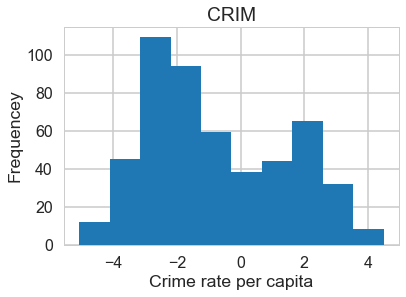

In [604]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot histograms for *RM* and *PTRATIO*, along with the two variables you picked in the previous section.</p>
</div>

### Ex. CRIM histogram

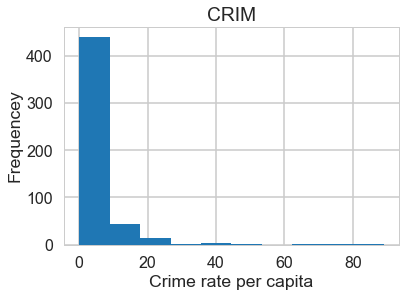

In [605]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

There is a huge difference between smallest and highest values of frequencies in normal histogram. And the smaller values are squeezed and not visible. Log scales allow a large range to be displayed without small values being compressed down into the bottom of the graph.



### Ex. Other historgrams

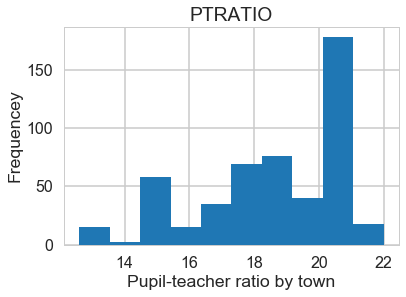

In [606]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Frequencey")
plt.show()

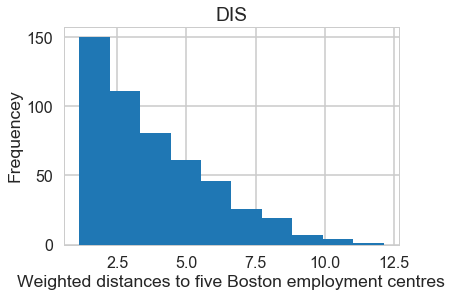

In [607]:
plt.hist(bos.DIS)
plt.title("DIS")
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Frequencey")
plt.show()

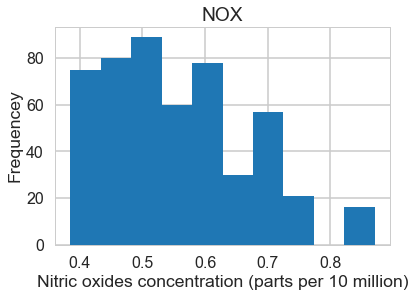

In [608]:
plt.hist(bos.NOX)
plt.title("NOX")
plt.xlabel("Nitric oxides concentration (parts per 10 million)")
plt.ylabel("Frequencey")
plt.show()

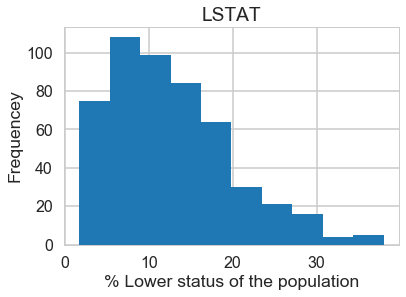

In [609]:
plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("% Lower status of the population")
plt.ylabel("Frequencey")
plt.show()

Let us also see the hist and kernel density plot for our target PRICE variable.

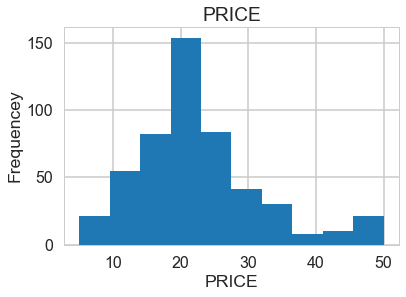

In [610]:
plt.hist(bos.PRICE)
plt.title("PRICE")
plt.xlabel("PRICE")
plt.ylabel("Frequencey")
plt.show()

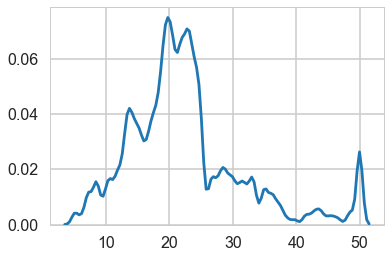

In [611]:
# kernel density plot to smooth out the histogram
sns.kdeplot(np.array(bos.PRICE), bw=0.5)

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [612]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [613]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 22 Apr 2018   Prob (F-statistic):           2.49e-74
Time:                        23:51:21   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

### Ex. scatterplot for fitted vs actual

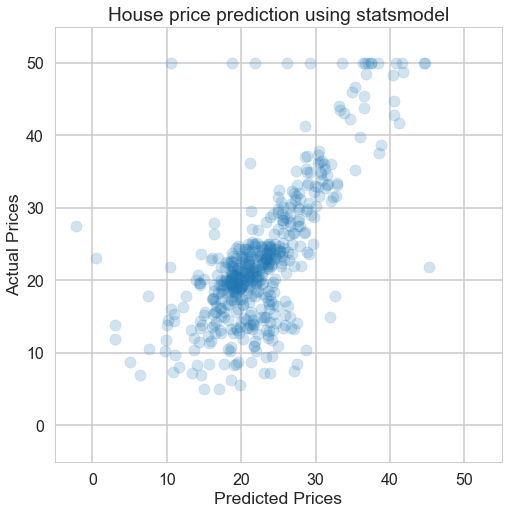

In [614]:
# your turn
plt.figure(figsize=(8,8))
plt.xlim(-5,55)
plt.ylim(-5,55)
plt.title('House price prediction using statsmodel')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.scatter(m.fittedvalues, bos.PRICE,alpha=0.2)


The plot shows that predicted and actual prices are varying linearly. But the slope of the line is not exact 45 degrees. If our predicted values matched the actual prices very well then the slope should have been 45 degrees. Here the slope is more than 45 degrees. And so in general the predicted prices are little lower than the actual prices.

Also there are many outliers. For some actual high prices the predictions are low and vice versa.

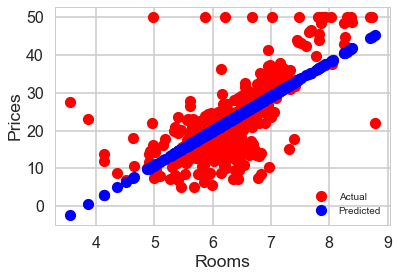

In [615]:
# How the predicted vs actual prices wrt RM show up
plt.plot(bos.RM, bos.PRICE,'ro')
plt.plot(bos.RM, m.fittedvalues,'bo')
plt.xlabel('Rooms')
plt.ylabel('Prices')
plt.legend(['Actual','Predicted'],fontsize=10)


### Fitting Linear Regression using `sklearn`


In [616]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [617]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [618]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


### Ex. intercept term

In [619]:
# your turn
lm_rto = LinearRegression(fit_intercept=False)
lm_rto.set_params(fit_intercept=False)
lm_rto.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

I would recommend **having an intercept** in our linear model.
- At first look the intercept basically would mean that the price of the house is not zero even though all the features are 0s. For example let us say we have only one feature that is number of rooms. If the number of rooms is zero the price of the house greater than zero doesn't make sense.
- So usually the intercept term(b₀) usually doesn't make much meaning in general. If the predictior var (X) data has a point xᵢ = 0, then the intercept b₀ would be equal to the mean of yᵢ's at the given xᵢ.
- But if our data doesn't have a point xᵢ=0, then removing the intercept term would be same as creating artificial data point xᵢ=0, yᵢ=0. And the resulting regression line would not be the best fitting line.

To confirm the recommendation let us first see compare the models with intercept=True/False scores.

In [620]:
lm.score(X, bos.PRICE)

0.7406077428649428

In [621]:
lm_rto.score(X, bos.PRICE)

0.71366390210414465

In the current scenario intercept=False model is worse, so we will keep the intercept.

### Ex. i.i.d. and normal?

The assumptions of the linear model are:
- The mean of the response, E(Yi), at each value of the predictor, xi, is a Linear function of the xi.
- The errors, εi, are Independent.
- The errors, εi, at each value of the predictor, xi, are Normally distributed.
- The errors, εi, at each value of the predictor, xi, have Equal variances (denoted σ²).

Here it is not sufficient that the residuals are normally distributed because:
- It is possible that we take a subset from normal distribution such that they are dependent on each other in some way.
- If we take our residuals from normal distributions but with different mean and variances then they would not be identically distributed.

### Ex. Y normally distributed?

To use Linear Regression Y need not be normally distributed. Theoretically, the Y distribution can be anything. For e.g. Y might be uniformly distributed i.e. all the values of Ys have equal probabilities. For linear regression we are bothered more about how Y varies with X. And the residuals should be normally and i.i.d.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [622]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280364015


In [623]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [624]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [625]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

### Ex. histogram of predicted prices

skew:  0.11077348255970675
kustosis:  0.10314181078832751
mean 22.5328063241
median 22.1206245188
standard deviation 7.90707132499


(array([   1.,    6.,   21.,   56.,  116.,  136.,   76.,   58.,   25.,   11.]),
 array([ -4.28300934,   0.61263152,   5.50827237,  10.40391323,
         15.29955409,  20.19519494,  25.0908358 ,  29.98647666,
         34.88211751,  39.77775837,  44.67339923]),
 <a list of 10 Patch objects>)

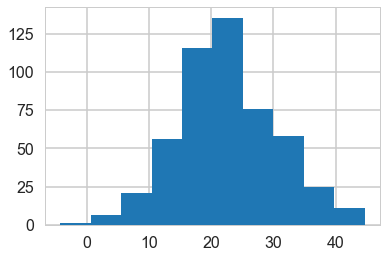

In [626]:
# your turn
y_predicted = lm.predict(X)
print('skew: ',stats.skew(y_predicted))
print('kustosis: ',stats.kurtosis(y_predicted))
print('mean',np.mean(y_predicted))
print('median',np.median(y_predicted))
print('standard deviation', np.std(y_predicted))
plt.hist(y_predicted)

The predicted prices histogram is quite normal. The skew and kustosis are near to zero and quite less than (-2,2) range. 
The center is around 22. Most of the houses are prices between 10 and 35. 
We can clearly see that there are values less than 0 and that is unrealistic. Because the house prices can't be less than zero.
The reason for these ouliers is that our model doesn't suggest anything about house prices to be always greater than zero. So the model tries to fit the data as best as it can. And hence few values are less than zero. My intuition tells that we should modify our model to exclude negative house prices.


### Ex. scatterplot fitted vs actual

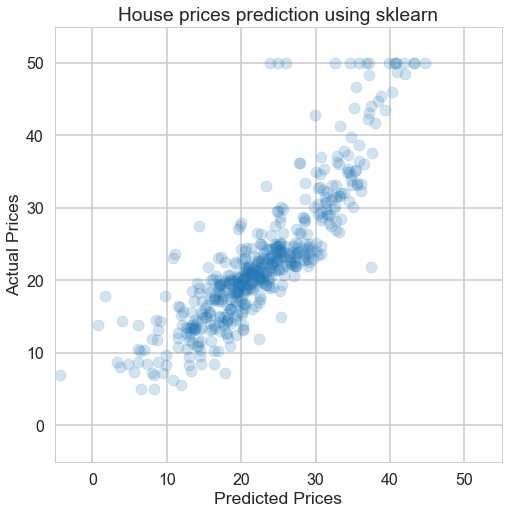

In [627]:
plt.figure(figsize=(8,8))
plt.xlim(-5,55)
plt.ylim(-5,55)
plt.title('House prices prediction using sklearn')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.scatter(y_predicted,bos.PRICE,alpha=0.2)

Its quite close to a 45 degree line. That means the predicted and actual values are close. But clearly for some high price houses the predicted values are not correct and very low.


### Ex. statsmodel vs sklearn
statsmodel provides a lot of statistics and is useful for hardcore statistics analysis. For e.g. it gives  p values for regression coefficients and F-statistic. It also provides data to analyze normality of residuals.

On the other hand, scikit-learn is easy to easy and the usage is very similar to all other algos of scikit-learn. Some of the statistics like p-values etc. needs to be calculated manually.

In general, statsmodel is good to apply, analyze and compare different models and scikit-learn can be used, at last, to do the actual regression.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [628]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149872


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [629]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

5.80189651524e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Make a scatterplot of `PTRATIO` and housing price. Tell a story about the relationship between the variables.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

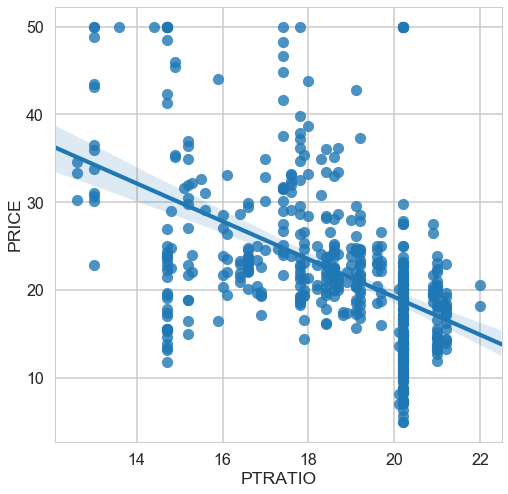

In [630]:
# your turn
#plt.scatter(x=bos.PTRATIO, y=bos.PRICE)
plt.figure(figsize=(8,8))
sns.regplot(x=bos.PTRATIO, y=bos.PRICE)

PTRATIO and PRICE seem to be linearly related however there is not a strong relation. The variation in PRICES for a given PTRATIO is high. Certainly for PTRATIO > 21 there is no high priced house.

In [631]:
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 22 Apr 2018   Prob (F-statistic):           1.61e-34
Time:                        23:51:22   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

Intercept may be interpreted as, for very low values of PTRATIO ≈ 0 the mean value of houses is 62.34

The coefficient value of PTRATIO variable means, for unit decrease in PTRATIO the mean PRICE of the house decreases by 2.15.

R² is the ratio of the variation in house PRICEs explained by the model and the total variation in PRICEs. In other words, 25.8% variation in PRICEs can be explained by using our model. Since this is not a high number, PTRATIO alone is not a very good predictor for PRICE.

F-statistic is computed to measure the statistical significatnce of coefficient/slope of the regression line. The test statistic is f=MSR/MSE i.e. the mean squared regression error divided by mean squared residual error. The P-value is determined by comparing f to an F distribution with 1 numerator degree of freedom and n-2 denominator degrees of freedom. Here is the p value is very low (1.61e-34) and hence our slope values is statistically significant.


The P-value associated with the t-test is the same as the P-value associated with the analysis of variance F-test. This will always be true for the simple linear regression model. The P-values are the same because of a well-known relationship between a t random variable and an F random variable that has 1 numerator degree of freedom. 

Namely: (t*(n−2))²=F*(1,n−2)     

*or* **(-13.233)² = 175.11**


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [632]:
# your turn
m = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 22 Apr 2018   Prob (F-statistic):           1.09e-97
Time:                        23:51:22   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

**F-statistic: 244.2, p value: 1.09e-97**

**R-squared: 0.593**

High value of F-static with very low p value means means that the regression coefficients are statistically significant. Also, 59.3% variation in house PRICEs can be explained by our model. This is good but we should check if adding other predictors to our model will improve the fit. The coefficient values for the predictor variable tells the significance of that variable. So in this case, RM is most significant in deciding the Price and then PTRATIO and last is CRIM.

Let us see try to use all the predictors for our model and find out which ones should be used.

In [633]:
# using all the features as is
m_all = ols('PRICE ~ CRIM + ZN + INDUS  + AGE + CHAS + NOX + RM+ DIS + RAD + TAX + PTRATIO + B + LSTAT ',bos).fit()
print(m_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 22 Apr 2018   Prob (F-statistic):          6.95e-135
Time:                        23:51:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

The predictors for INDUS and AGE have p values higher than 0.01, so should be removed from our model. Also the warning say that there might be multicollinearity. Try out reduced model.

After trying out some more models using sklearn Ridge and Lasso regression and knowing that some features are non-linearly related to PRICE, here is a good model that we should try.

In [634]:
m_good = ols('PRICE ~ CHAS + NOX + RM + np.log(DIS) + RAD + TAX + PTRATIO + B + np.log(LSTAT)',bos).fit()
#m_good = ols('PRICE ~ CHAS + NOX + RM + RAD + TAX + PTRATIO + np.log(LSTAT)',bos).fit()

print(m_good.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     208.2
Date:                Sun, 22 Apr 2018   Prob (F-statistic):          3.26e-162
Time:                        23:51:22   Log-Likelihood:                -1444.5
No. Observations:                 506   AIC:                             2909.
Df Residuals:                     496   BIC:                             2951.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        58.3669      4.906     11.897

The above model looks good. With R-squared as 79% and coefs that are statistifcally significant. However one issue about multi-collinearity should be re-visited.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{full} - RSS_{reduced}}{K_{full} - K_{reduced}} \right)}{\left( \frac{RSS_{reduced}}{N - K_{reduced}} \right)}$$

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [635]:
# in the last excercise we already add most of the variables 
# now we can try to reduce some of those and see how it affects the model
m_2 = ols('PRICE ~ np.log(CRIM) + CHAS + NOX + RM + PTRATIO + np.log(LSTAT)',bos).fit()
print(m_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     240.6
Date:                Sun, 22 Apr 2018   Prob (F-statistic):          9.43e-144
Time:                        23:51:22   Log-Likelihood:                -1496.4
No. Observations:                 506   AIC:                             3007.
Df Residuals:                     499   BIC:                             3036.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        41.2531      4.660      8.854

After comparing the two models: model1-(PRICE ~ CRIM + RM + PTRATIO) and model2-(PRICE ~ np.log(CRIM) + CHAS + NOX + RM + PTRATIO + np.log(LSTAT)) both pass the F test. model2 is better as compared to the model1 because of the lower value of AIC.

However the third model that we found earlier (PRICE ~ CHAS + NOX + RM + np.log(DIS) + RAD + TAX + PTRATIO + B + np.log(LSTAT)) seems to even better, except for the multicollinearity issue.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

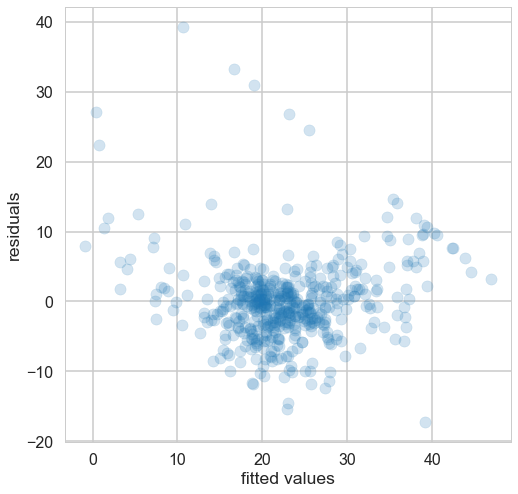

In [636]:
# Your turn.
plt.figure(figsize=(8,8))
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.scatter(m.fittedvalues,m.resid,alpha=0.2)

Most of the points are randomly placed on the horizontal line of 0, except for few outliers. This strongly suggests our model data has outliers. We can also say that since residuals have some dependence pattern with respect to fitted values, so that suggests that the residual are not identically distributed.

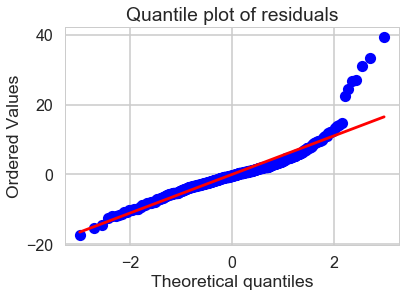

In [637]:
import pylab
stats.probplot(m.resid, dist="norm", plot=pylab)
pylab.title("Quantile plot of residuals")
pylab.show()

The normal probability plot of the residuals is approximately linear except for few outliers. supporting the condition that the error terms are normally distributed. We could proceed with the assumption that the error terms are normally distributed upon removing the outliers from the data set.

Fitted vs. residual and quantile plot are used to identify specific problems with our Linear Regression fit.

Residual plot help to reveal problems related to following:
- a non-linear regression function shows up on a residuals vs. fits plot
- unequal error variances show up on a residuals vs. fits plot
- an outlier show up on a residuals vs. fits plot.

On other hand Quantile plot helps in checking if the error terms are normally distributed or not.


### Influence analysis

**Influential data point** - If its presence changes the regression line significantly.
**Outlier** - If there is extreme value of dependent variable Y.
**High Leverage** - If the predictor variable or combination of variables X in case of multiple regression, have unsual value or an extreme value.

A datapoint can be influential if it is an outlier or high leverage point or both.

In [638]:
# influence for model m
influence = m.get_influence()

resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

In [639]:
outlier_analysis = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
outlier_analysis = pd.concat([ bos[['CRIM','RM','PTRATIO','PRICE']], pd.Series(m.predict(),name="predicted PRICE"), outlier_analysis], axis = 1)
outlier_analysis.head() 

,CRIM,RM,PTRATIO,PRICE,predicted PRICE,cooks,dffits,leverage,resid_student
0,0.00632,6.575,15.3,24.0,28.790849,0.001043,-0.064557,0.006208,-0.816770
1,0.02731,6.421,17.8,21.6,24.964378,0.000197,-0.028036,0.002394,-0.572286
2,0.02729,7.185,17.8,34.7,30.603899,0.000655,0.051156,0.005344,0.697897
3,0.03237,6.998,18.7,33.4,28.255751,0.000913,0.060426,0.004731,0.876456
4,0.06905,7.147,18.7,36.2,29.348191,0.001993,0.089311,0.005806,1.168710


In [640]:
r = outlier_analysis.resid_student
print('-'*30 + ' studentized residual ' + '-'*30)
print(r.describe())
print('\n')

outliars = outlier_analysis[(outlier_analysis.resid_student>3) | (outlier_analysis.resid_student<-3)]
print('-'*30 + ' outliars ' + '-'*30)
print(outliars)
print('\n')

print("Outliar points index", outliars.index)

------------------------------ studentized residual ------------------------------
count    506.000000
mean       0.002685
std        1.014121
min       -3.003755
25%       -0.513057
50%       -0.055538
75%        0.376735
max        7.030058
Name: resid_student, dtype: float64


------------------------------ outliars ------------------------------
         CRIM     RM  PTRATIO  PRICE  predicted PRICE     cooks    dffits  \
364   3.47428  8.780     20.2   21.9        39.102779  0.084848 -0.587209   
365   4.55587  3.561     20.2   27.5         0.359783  0.189502  0.889500   
367  13.52220  3.863     20.2   23.1         0.776834  0.100458  0.642814   
368   4.89822  4.970     20.2   50.0        10.691218  0.103977  0.675297   
369   5.66998  6.683     20.2   50.0        23.179862  0.025968  0.328889   
370   6.53876  7.016     20.2   50.0        25.462335  0.032852  0.368635   
371   9.23230  6.216     20.2   50.0        19.012691  0.026468  0.334467   
372   8.26725  5.875     20.2   

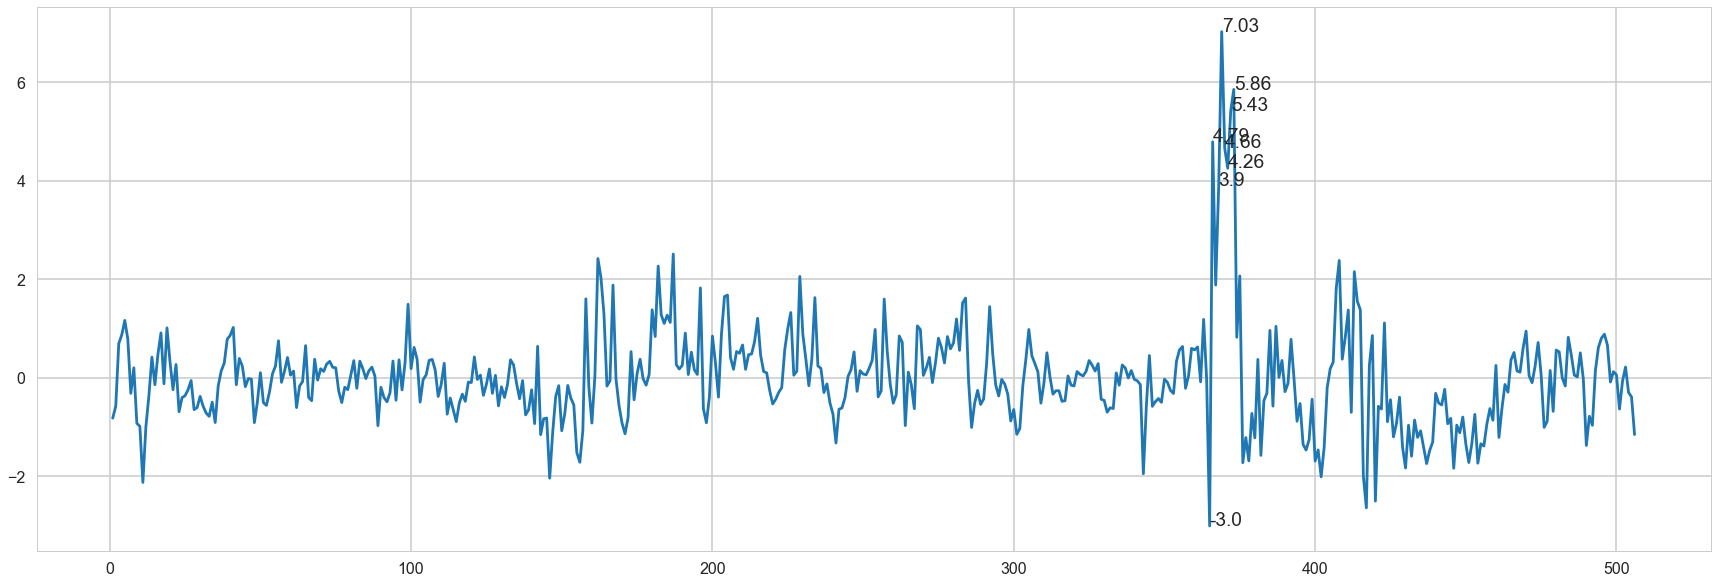

In [641]:
plt.figure(figsize=(30,10))
points = zip(np.arange(1,507,1),r)

plt.plot(np.arange(1,507,1),r)
for key, value in enumerate(points):
    if value[1] > 3 or value[1] < -3:
        plt.annotate(np.round(value[1],decimals=2),(value[0],value[1]))
plt.show()

If an observation has an externally studentized residual that is larger than 3 (in absolute value) we can call it an outlier. Here we can see 8 such values. But just being an outlier doesn't mean that the point is influential.

Now let us check on leverages. A common rule is to flag any observation whose leverage value, hii, is more than 3 times larger than the mean leverage value: 3*p/n .i.e 12/506=0.02

In [642]:
lev = outlier_analysis.leverage
print(sum(lev))
print('-'*30 + ' leverage ' + '-'*30)
print(lev.describe())
print('\n')

leverages = outlier_analysis[outlier_analysis.leverage > 0.023]
print('-'*30 + ' top leverages ' + '-'*30)
print(leverages.head())
print(leverages.shape)
print("\nHigh leverage points index", leverages.index)

4.0
------------------------------ leverage ------------------------------
count    506.000000
mean       0.007905
std        0.013827
min        0.002279
25%        0.003458
50%        0.004861
75%        0.007531
max        0.220882
Name: leverage, dtype: float64


------------------------------ top leverages ------------------------------
        CRIM     RM  PTRATIO  PRICE  predicted PRICE     cooks    dffits  \
144  2.77974  4.903     14.7   11.8        16.532846  0.003912 -0.125049   
225  0.52693  8.725     17.4   50.0        42.300204  0.012334  0.222288   
257  0.61154  8.704     13.0   50.0        46.854513  0.002312  0.096107   
262  0.52014  8.398     13.0   48.8        44.614226  0.003413  0.116791   
265  0.76162  5.560     13.0   22.8        23.616535  0.000116 -0.021533   

     leverage  resid_student  
144  0.023067      -0.813809  
225  0.027244       1.328270  
257  0.030407       0.542709  
262  0.025598       0.720572  
265  0.023011      -0.140309  
(19, 9)

High

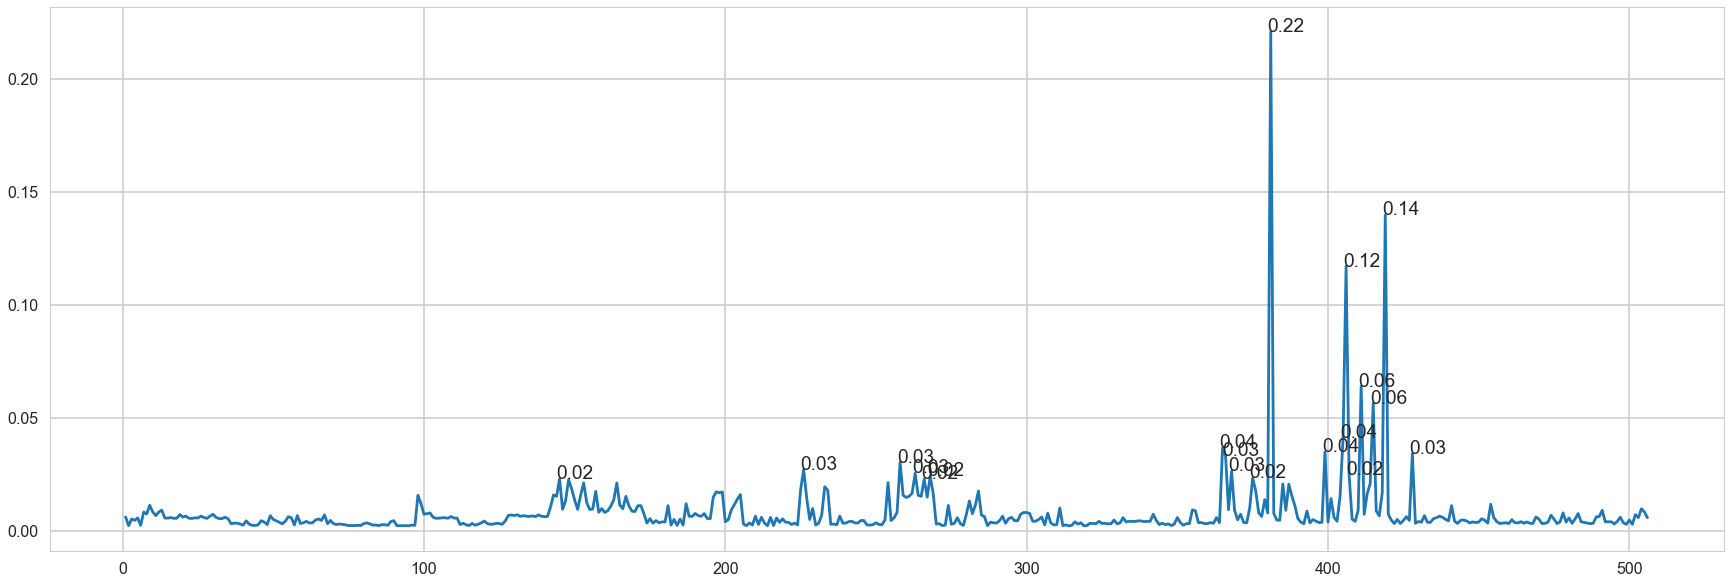

In [643]:
plt.figure(figsize=(30,10))
plt.plot(np.arange(1,507,1),lev)

for i in leverages.index:
    plt.annotate(np.round(leverages.leverage.loc[i],decimals=2), (i,leverages.leverage.loc[i]))
plt.show()

We can make a plot that shows the leverage by the residual squared and look for observations that are jointly high on both of these measures. We can do this using a leverage versus residual-squared plot. Using residual squared instead of residual itself, the graph is restricted to the first quadrant and the relative positions of data points are preserved. This is a quick way of checking potential influential observations and outliers at the same time. Both types of points are of great concern for us.

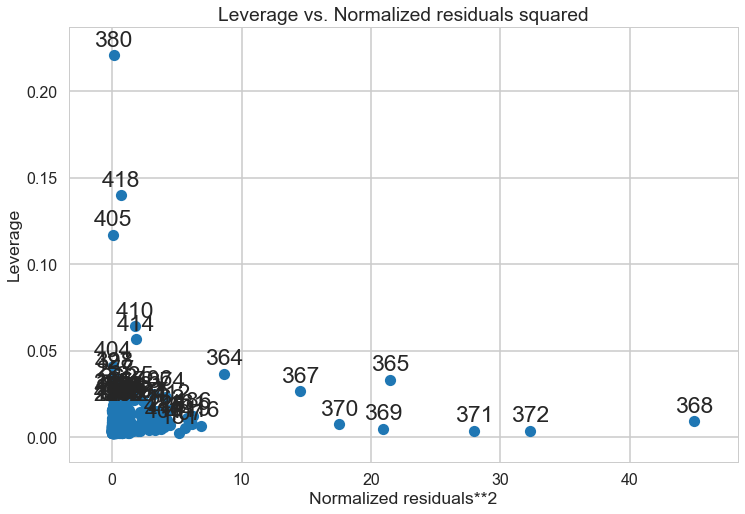

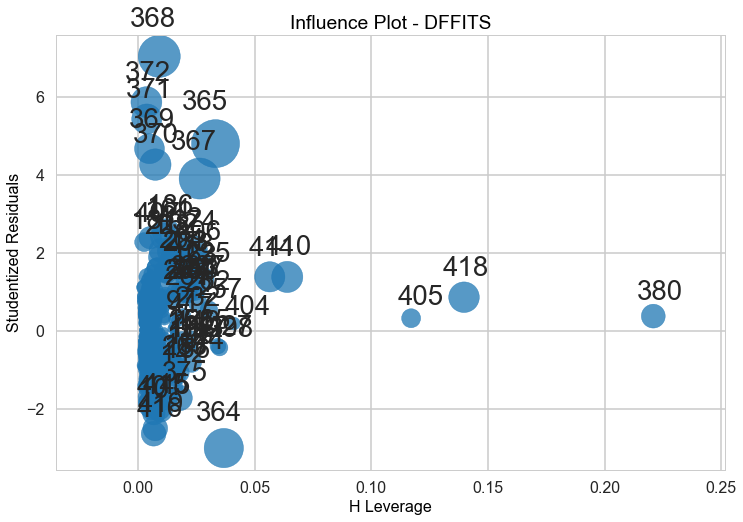

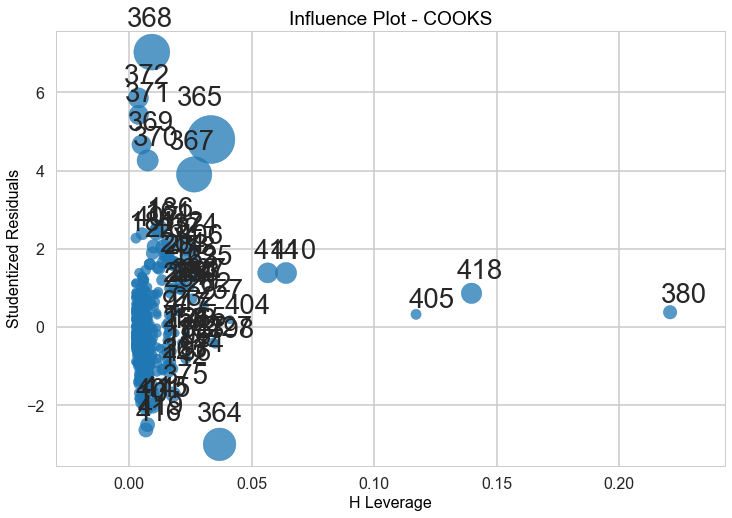

In [644]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot

fig, ax = plt.subplots(figsize=(12,8))
plot_leverage_resid2(m, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,8))
influence_plot(m, ax=ax, criterion="dffits")
plt.title("Influence Plot - DFFITS")
plt.show()

fig, ax = plt.subplots(figsize=(12,8))
influence_plot(m, ax=ax, criterion="cooks")
plt.title("Influence Plot - COOKS")
plt.show()

An observation is deemed influential if the absolute value of its DFFITS value is greater than 2\*sqrt(p+1/n-p-1) where n is the number of data points and p is the number of params including the intercept. In our case it is 2\*sqrt(5/500)=0.2

In [645]:
# data points where |DFFITS| > 0.2
influential_points = outlier_analysis[outlier_analysis.dffits > 0.2]
influential_points.head()

,CRIM,RM,PTRATIO,PRICE,predicted PRICE,cooks,dffits,leverage,resid_student
161,1.46336,7.489,14.7,50.0,35.887631,0.016209,0.255860,0.011016,2.424286
162,1.83377,7.802,14.7,50.0,38.123198,0.014556,0.242052,0.013886,2.039754
166,2.01019,7.929,14.7,50.0,39.025000,0.013760,0.235201,0.015328,1.885122
186,0.05602,7.831,17.8,50.0,35.366585,0.019174,0.278405,0.012093,2.516291
195,0.01381,7.875,14.4,50.0,39.352140,0.012633,0.225313,0.014961,1.828208


Guidelines commonly used to get influential points using Di cook's distance:

- If Di is greater than 0.5, then the ith data point is worthy of further investigation as it may be influential.
- If Di is greater than 1, then the ith data point is quite likely to be influential.
- Or, if Di sticks out like a sore thumb from the other Di values, it is almost certainly influential.

In [646]:
outlier_analysis[outlier_analysis.cooks > 0.5]

,CRIM,RM,PTRATIO,PRICE,predicted PRICE,cooks,dffits,leverage,resid_student


No influential points by Cook's distance method.

In [647]:
print("Influential points index", influential_points.index)

Influential points index Int64Index([161, 162, 166, 186, 195, 204, 225, 228, 233, 283, 365, 367, 368,
            369, 370, 371, 372, 374, 380, 406, 410, 412, 413, 414, 418],
           dtype='int64')


In [648]:
no_influence_outliars = list(set(outliars.index) - set(influential_points.index))
print("No influence outliars: ", no_influence_outliars)

No influence outliars:  [364]


In [649]:
no_influence_leverages = list(set(leverages.index) - set(influential_points.index))
print("No influence high leverage points: ", no_influence_leverages)

No influence high leverage points:  [257, 262, 265, 267, 364, 427, 398, 144, 404, 405]


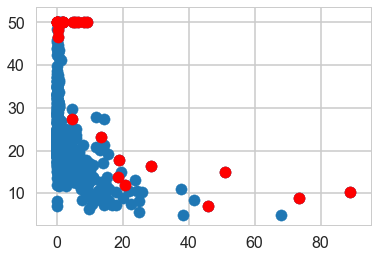

In [650]:
plt.scatter(bos.CRIM,bos.PRICE)
plt.scatter(influential_points.CRIM,influential_points.PRICE,color='r')

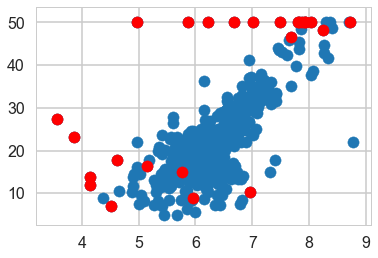

In [651]:
plt.scatter(bos.RM,bos.PRICE)
plt.scatter(influential_points.RM,influential_points.PRICE,color='r')

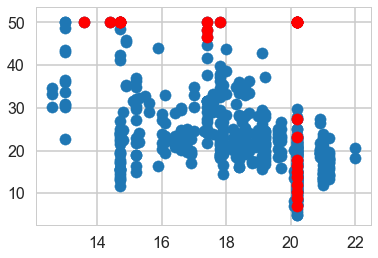

In [652]:
plt.scatter(bos.PTRATIO,bos.PRICE)
plt.scatter(influential_points.PTRATIO,influential_points.PRICE,color='r')

In [653]:
# not let us delete those data points and see how our model works
bos_mod = bos.drop(influential_points.index)
bos_mod.shape

(481, 14)

In [654]:
m = ols('PRICE ~ CRIM + RM + PTRATIO',bos_mod).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     405.3
Date:                Sun, 22 Apr 2018   Prob (F-statistic):          9.28e-131
Time:                        23:51:26   Log-Likelihood:                -1376.0
No. Observations:                 481   AIC:                             2760.
Df Residuals:                     477   BIC:                             2777.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4234      3.097     -2.074      0.0

After dropping the influential points the fitting is better. R-squared is 71%. And all the p-values for the coefficients are 0 and so the coefficients are statistically significant. p-value for F-statistic is very low.

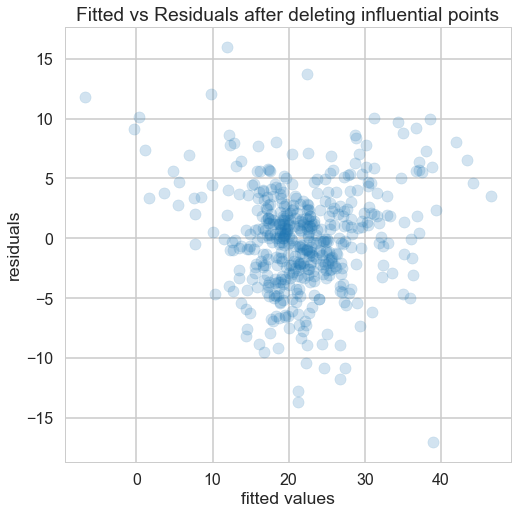

In [655]:
# Your turn.
plt.figure(figsize=(8,8))
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.scatter(m.fittedvalues,m.resid,alpha=0.2)
plt.title("Fitted vs Residuals after deleting influential points")
plt.show()

Most of the points are randomly placed on the horizontal line of 0. Removal of outliars improved the fitting conditions.

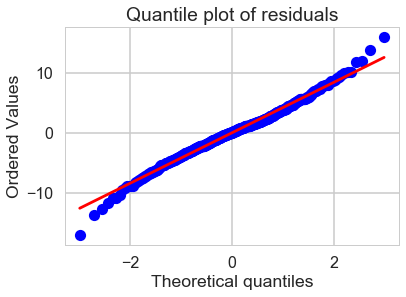

In [656]:
import pylab
stats.probplot(m.resid, dist="norm", plot=pylab)
pylab.title("Quantile plot of residuals")
pylab.show()

This looks almost normal now.

### Other model - m_good

In [657]:
m_good = ols('PRICE ~ NOX + RM + np.log(DIS) + RAD + TAX + PTRATIO + B + np.log(LSTAT)',bos).fit()

print(m_good.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 22 Apr 2018   Prob (F-statistic):          3.34e-161
Time:                        23:51:26   Log-Likelihood:                -1449.7
No. Observations:                 506   AIC:                             2917.
Df Residuals:                     497   BIC:                             2955.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        58.7602      4.950     11.871

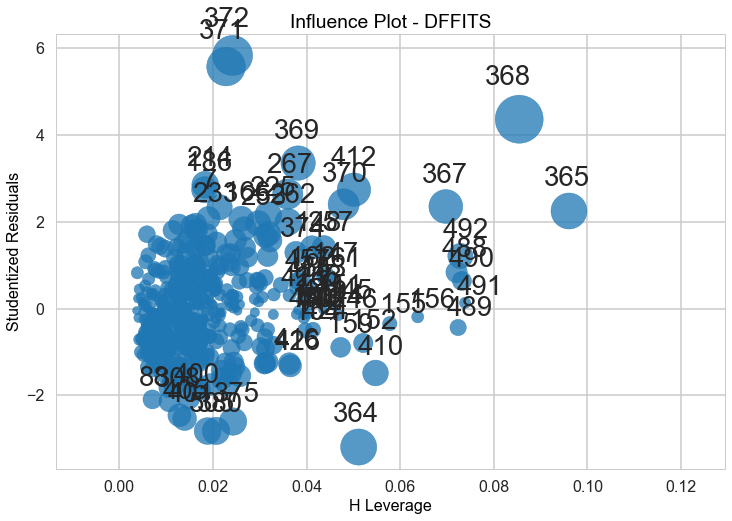

In [658]:
# influence for model m
influence = m_good.get_influence()

resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots(figsize=(12,8))
influence_plot(m_good, ax=ax, criterion="dffits")
plt.title("Influence Plot - DFFITS")
plt.show()

In [659]:
outlier_analysis = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
outlier_analysis = pd.concat([ bos[['CRIM','RM','PTRATIO','PRICE']], pd.Series(m_good.predict(),name="predicted PRICE"), outlier_analysis], axis = 1)
outlier_analysis.head() 

,CRIM,RM,PTRATIO,PRICE,predicted PRICE,cooks,dffits,leverage,resid_student
0,0.00632,6.575,15.3,24.0,31.778243,0.003934,-0.188611,0.010520,-1.829191
1,0.02731,6.421,17.8,21.6,24.648131,0.000246,-0.046984,0.004329,-0.712556
2,0.02729,7.185,17.8,34.7,34.213622,0.000013,0.010692,0.008736,0.113895
3,0.03237,6.998,18.7,33.4,35.223997,0.000362,-0.056994,0.017339,-0.429066
4,0.06905,7.147,18.7,36.2,30.301210,0.002099,0.137557,0.009772,1.384695


In [660]:
# data points where |DFFITS| > 2*sqrt(9/497)=0.27
influential_points = outlier_analysis[outlier_analysis.dffits > 0.27]
influential_points.head()

# not let us delete those data points and see how our model works
bos_mod = bos.drop(influential_points.index)
bos_mod.shape

(482, 14)

In [661]:
m_good = ols('PRICE ~ NOX + RM + np.log(DIS) + RAD + TAX + PTRATIO + B + np.log(LSTAT)',bos_mod).fit()

print(m_good.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     298.1
Date:                Sun, 22 Apr 2018   Prob (F-statistic):          2.40e-179
Time:                        23:51:27   Log-Likelihood:                -1263.2
No. Observations:                 482   AIC:                             2544.
Df Residuals:                     473   BIC:                             2582.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.4944      4.406      9.646

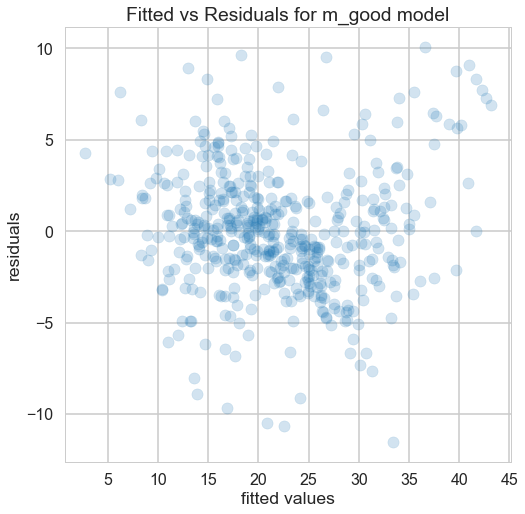

In [662]:
# Your turn.
plt.figure(figsize=(8,8))
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.title("Fitted vs Residuals for m_good model")
plt.scatter(m_good.fittedvalues,m_good.resid,alpha=0.2)
plt.show()

Most of the points are randomly placed on the horizontal line of 0. Removal of outliars improved the fitting conditions.

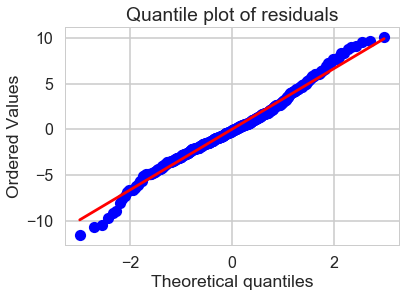

In [663]:
import pylab
stats.probplot(m_good.resid, dist="norm", plot=pylab)
pylab.title("Quantile plot of residuals")
pylab.show()

### other model - m_2

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     240.6
Date:                Sun, 22 Apr 2018   Prob (F-statistic):          9.43e-144
Time:                        23:51:27   Log-Likelihood:                -1496.4
No. Observations:                 506   AIC:                             3007.
Df Residuals:                     499   BIC:                             3036.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        41.2531      4.660      8.854

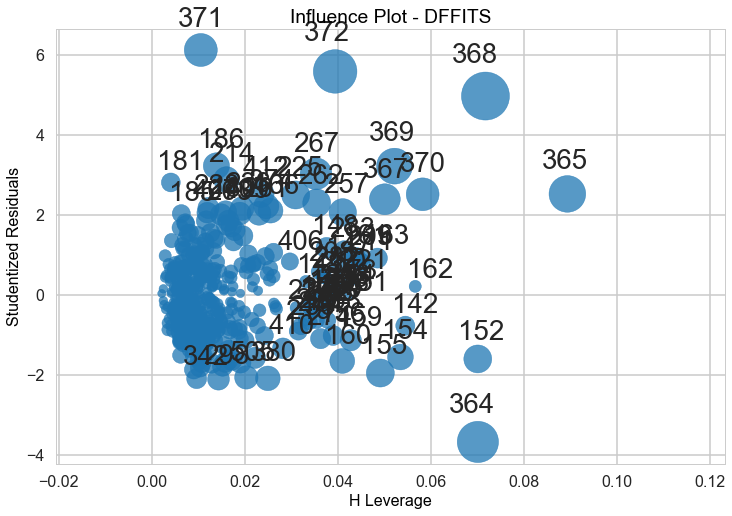


       CRIM     RM  PTRATIO  PRICE  predicted PRICE     cooks    dffits  \
0  0.00632  6.575     15.3   24.0        30.681432  0.008044 -0.237640   
1  0.02731  6.421     17.8   21.6        24.894594  0.000268 -0.043298   
2  0.02729  7.185     17.8   34.7        33.258910  0.000048  0.018227   
3  0.03237  6.998     18.7   33.4        33.905935  0.000489 -0.058486   
4  0.06905  7.147     18.7   36.2        30.330395  0.001343  0.097003   

   leverage  resid_student  
0  0.022205      -1.576966  
1  0.006580      -0.532021  
2  0.010334       0.178378  
3  0.016214      -0.455572  
4  0.007128       1.144881  

         CRIM     RM  PTRATIO  PRICE  predicted PRICE     cooks    dffits  \
166  2.01019  7.929     14.7   50.0        22.509120  0.016428  0.340273   
180  0.06588  7.765     17.8   39.8        23.466216  0.009831  0.263193   
186  0.05602  7.831     17.8   50.0        35.543677  0.020532  0.382657   
214  0.28955  5.412     18.6   23.7        19.920918  0.019077  0.368088 

In [664]:
m_2 = ols('PRICE ~ np.log(CRIM) + CHAS + NOX + RM + PTRATIO + np.log(LSTAT)',bos).fit()
print(m_2.summary())

# influence for model m
influence = m_2.get_influence()

resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots(figsize=(12,8))
influence_plot(m_2, ax=ax, criterion="dffits")
plt.title("Influence Plot - DFFITS")
plt.show()

outlier_analysis = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
outlier_analysis = pd.concat([ bos[['CRIM','RM','PTRATIO','PRICE']], pd.Series(m_good.predict(),name="predicted PRICE"), outlier_analysis], axis = 1)
print('\n',outlier_analysis.head())

# 2*sqrt(8/498)
# data points where |DFFITS| > 0.25
influential_points = outlier_analysis[outlier_analysis.dffits > 0.25]
print('\n',influential_points.head())

# not let us delete those data points and see how our model works
bos_mod = bos.drop(influential_points.index)
print('\n',bos_mod.shape)

m_2 = ols('PRICE ~ np.log(CRIM) + CHAS + NOX + RM + PTRATIO + np.log(LSTAT)',bos_mod).fit()
print('\n',m_2.summary())

In [665]:
m.params, m_good.params, m_2.params

(Intercept   -6.423398
 CRIM        -0.343658
 RM           7.599186
 PTRATIO     -0.999838
 dtype: float64, Intercept        42.494351
 NOX             -12.296321
 RM                3.563024
 np.log(DIS)      -3.718413
 RAD               0.181441
 TAX              -0.013565
 PTRATIO          -0.824893
 B                 0.010617
 np.log(LSTAT)    -6.942751
 dtype: float64, Intercept        31.880265
 np.log(CRIM)     -0.157475
 CHAS              2.269296
 NOX              -4.130909
 RM                3.672442
 PTRATIO          -0.786017
 np.log(LSTAT)    -6.962075
 dtype: float64)

In [666]:
def get_equation(model):
    equation = ""
    for item in model.params.iteritems():
        equation = equation + ' + [' + str(np.round(item[1],decimals=2)) + '*' + str(item[0] + "]")
        
    equation = equation.replace('*Intercept','').strip(' + ')
    
    return equation
get_equation(m)

'[-6.42] + [-0.34*CRIM] + [7.6*RM] + [-1.0*PTRATIO]'

In [667]:
AIC = [m.aic, m_good.aic, m_2.aic]
AdjR2 = [m.rsquared_adj, m_good.rsquared_adj, m_2.rsquared_adj]
Fvalue = [m.fvalue, m_good.fvalue, m_2.fvalue]
Fpvalue = [m.f_pvalue, m_good.f_pvalue, m_2.f_pvalue]

equation = [get_equation(m), get_equation(m_good), get_equation(m_2)]

comparison_df = pd.DataFrame({"Adj. R-squared":AdjR2, "AIC": AIC, "Fvalue": Fvalue, "F_pvalue": Fpvalue,
                              "Equation": equation}, index=["Model m","Model m_good", "Model m_2"])
comparison_df = comparison_df[["Adj. R-squared", "AIC", "Fvalue", "F_pvalue", "Equation"]]
print(comparison_df)

              Adj. R-squared          AIC      Fvalue       F_pvalue  \
Model m             0.716465  2760.037098  405.304006  9.283294e-131   
Model m_good        0.831677  2544.446457  298.076106  2.396844e-179   
Model m_2           0.802916  2643.030098  330.312322  1.122796e-166   

                                                       Equation  
Model m       [-6.42] + [-0.34*CRIM] + [7.6*RM] + [-1.0*PTRA...  
Model m_good  [42.49] + [-12.3*NOX] + [3.56*RM] + [-3.72*np....  
Model m_2     [31.88] + [-0.16*np.log(CRIM)] + [2.27*CHAS] +...  


This is the final regression line given by the best model m_good for future predictions: 

In [668]:
print(get_equation(m_good))

[42.49] + [-12.3*NOX] + [3.56*RM] + [-3.72*np.log(DIS)] + [0.18*RAD] + [-0.01*TAX] + [-0.82*PTRATIO] + [0.01*B] + [-6.94*np.log(LSTAT)]
